# The Coinbase Pro API

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from subprocess import Popen, PIPE
import json
from datetime import datetime

# plotting library:
import matplotlib
import matplotlib.pyplot as plt

# the coinbase pro API endpoint: 
cbpro_endpoint = "https://api.pro.coinbase.com"

## Testing your connection to the API 

In [2]:
# REST API sandbox URL: 
sandbox_url = "https://api-public.sandbox.pro.coinbase.com"
cmd = [
    "curl",
    sandbox_url,
    ]
p = Popen(cmd,stdout=PIPE,stderr=PIPE)
stdout,stderr = p.communicate()
json.loads(stdout)

{'message': 'see https://docs.pro.coinbase.com for API documentation'}

## Unauthenticated API endpoints

In [3]:
# list of products available for trading
# on Coinbase Pro:
url = "%s/products"%cbpro_endpoint
cmd = [
    "curl",
    url,
    ]
p = Popen(cmd,stdout=PIPE,stderr=PIPE)
stdout,stderr = p.communicate()

# stdout is a JSON object that can be converted into a 
# list of Python dictionaries with json.loads():
products_out = json.loads(stdout)
products_out[0]

{'id': 'EOS-BTC',
 'base_currency': 'EOS',
 'quote_currency': 'BTC',
 'base_min_size': '0.1',
 'base_max_size': '50000',
 'quote_increment': '0.000001',
 'base_increment': '0.1',
 'display_name': 'EOS/BTC',
 'min_market_funds': '0.001',
 'max_market_funds': '30',
 'margin_enabled': False,
 'fx_stablecoin': False,
 'max_slippage_percentage': '0.10000000',
 'post_only': False,
 'limit_only': False,
 'cancel_only': False,
 'trading_disabled': False,
 'status': 'online',
 'status_message': ''}

## API wrapper class

In [4]:
class apiwrapper:
    def __init__(
        self,
        name,
        endpoint="https://api.pro.coinbase.com",
        ):
        self.name=name
        self.endpoint=endpoint
    def query(
        self,
        request,
        method="GET",
        ):
        url="%s/%s"%(self.endpoint,request)
        cmd=[
            "curl",
            url,
            ]
        p = Popen(cmd,stdout=PIPE,stderr=PIPE)
        stdout,stderr = p.communicate()
        return json.loads(stdout)
        

In [5]:
myapi = apiwrapper("myapi")
products = myapi.query("products")
products[0]

{'id': 'EOS-BTC',
 'base_currency': 'EOS',
 'quote_currency': 'BTC',
 'base_min_size': '0.1',
 'base_max_size': '50000',
 'quote_increment': '0.000001',
 'base_increment': '0.1',
 'display_name': 'EOS/BTC',
 'min_market_funds': '0.001',
 'max_market_funds': '30',
 'margin_enabled': False,
 'fx_stablecoin': False,
 'max_slippage_percentage': '0.10000000',
 'post_only': False,
 'limit_only': False,
 'cancel_only': False,
 'trading_disabled': False,
 'status': 'online',
 'status_message': ''}

## Retrieving coinbase time history

In [6]:
# https://docs.pro.coinbase.com/#get-trades
product_id = "BTC-USD"
start_iso = "2021-01-01T01:00:00Z"
end_iso = datetime.now().strftime("%Y-%m-%dT%H:%M:%SZ")
granularity = "86400" #day
url = "products/%s/candles?start=%s&end=%s&granularity=%s" %(
    product_id,
    start_iso,
    end_iso,
    granularity,
    )

# retreive data:
btc = myapi.query(url)

In [7]:
btc[0]

[1630886400, 51020.08, 52219.95, 51789.17, 51930.86, 7434.62112948]

In [8]:
# create dataframe:
df = pd.DataFrame(btc)
df.columns = ["UTC","low","high","open","close","volume"]

# convert UTC times into human readable:
df["date"] = pd.to_datetime(df.UTC,unit="s")
df = df.set_index("date")

# display to console:
df.head()

,UTC,low,high,open,close,volume
date,,,,,,
2021-09-06,1630886400,51020.08,52219.95,51789.17,51930.86,7434.621129
2021-09-05,1630800000,49500.00,51907.08,49944.89,51789.17,7743.934723
2021-09-04,1630713600,49400.00,50558.75,50025.00,49942.98,7595.488165
2021-09-03,1630627200,48349.66,51064.44,49279.38,50025.00,14577.226219
2021-09-02,1630540800,48620.73,50392.19,48834.27,49279.37,14120.382641


<IPython.core.display.Javascript object>


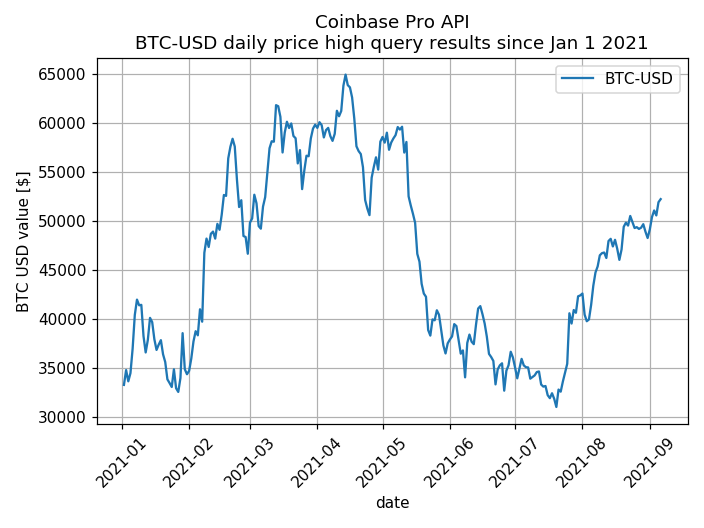

In [10]:
# plot:
plt.figure()
plt.title("""Coinbase Pro API
BTC-USD daily price high query results since Jan 1 2021""")
plt.plot(
    df.index,
    df.high,
    label="BTC-USD",
    )
plt.legend()
plt.grid()
plt.xlabel("date")
plt.xticks(rotation=45)
plt.ylabel("BTC USD value [$]")
plt.tight_layout()